In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('./music_genre.csv')

In [3]:
# Clean table of instance_id, artist_name, track_name, key, mode, and obtained_date
df = df.drop(['instance_id', 'artist_name', 'track_name', 'key', 'mode', 'obtained_date'], axis=1)

# Clean table of songs with negative duration
negative_lengths = df[df['duration_ms'] < 0].index
df.drop(negative_lengths, inplace=True)

# Clean table of songs with unknown tempo
unknown_tempo = df[df['tempo'] == '?'].index
df.drop(unknown_tempo, inplace=True)

# Clean table of songs with NaN values
df = df.dropna(subset=['popularity', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'music_genre'])

# Round tempos
def df_value_round(x):
    x = float(x)
    return round(x)

df['tempo'] = df['tempo'].apply(df_value_round)

# convert duration_ms to durastion_secs
def ms_to_s(x):
    x = float(x)
    return x / 1000

df['duration_ms'] = df['duration_ms'].apply(ms_to_s)
df = df.rename(columns={'duration_ms': 'duration_secs'})

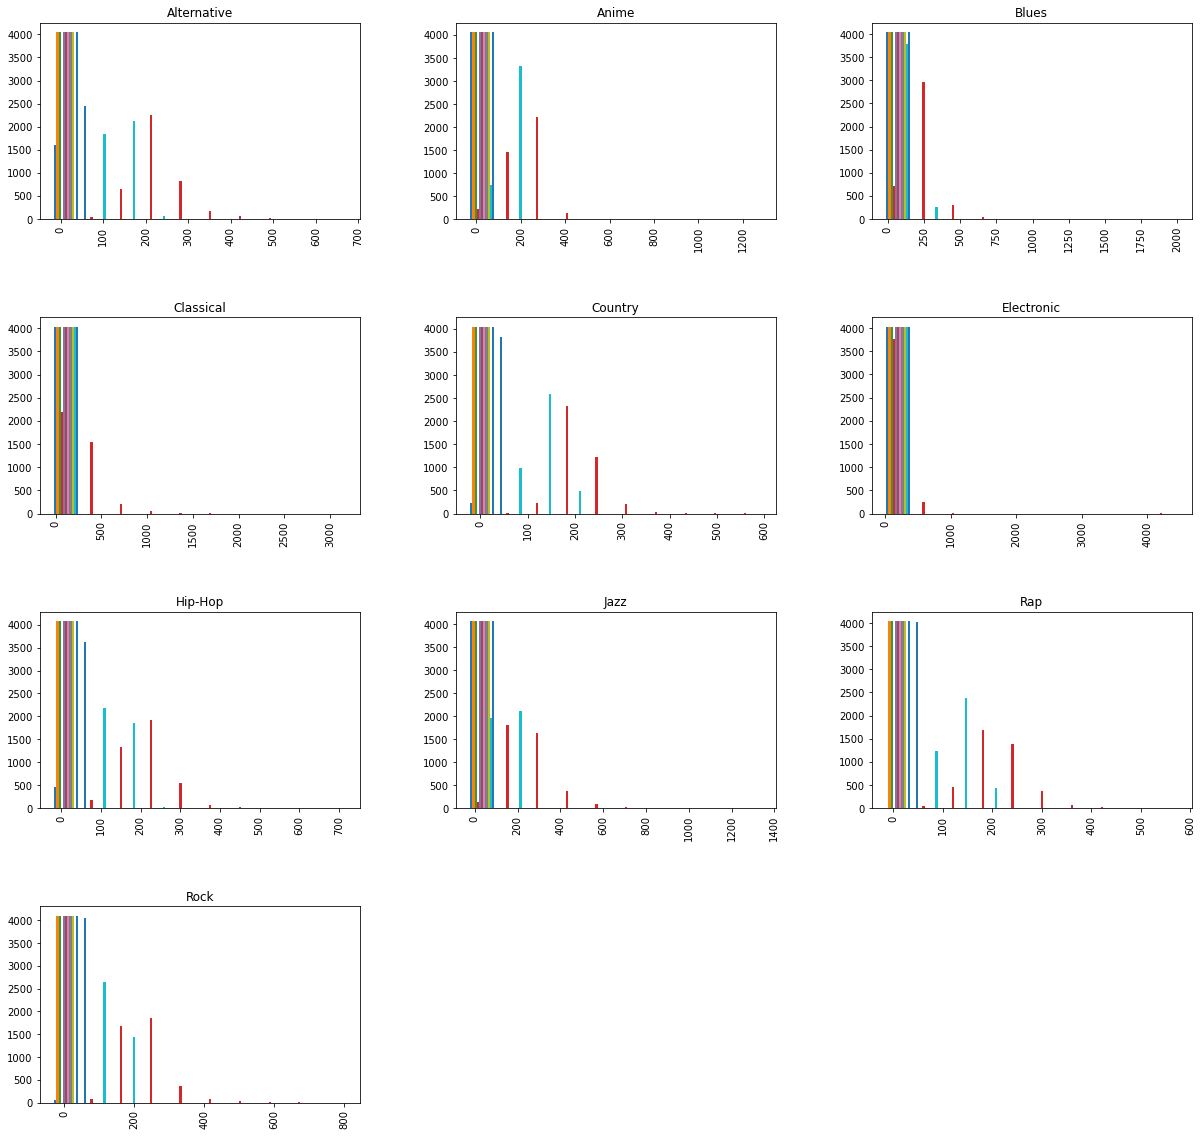

In [62]:
# histograms of each genre
df.hist(by=df['music_genre'], figsize = (20,20));

In [4]:
# split data into test and train
train_df, test_df = train_test_split(df, test_size=.25, shuffle=True)

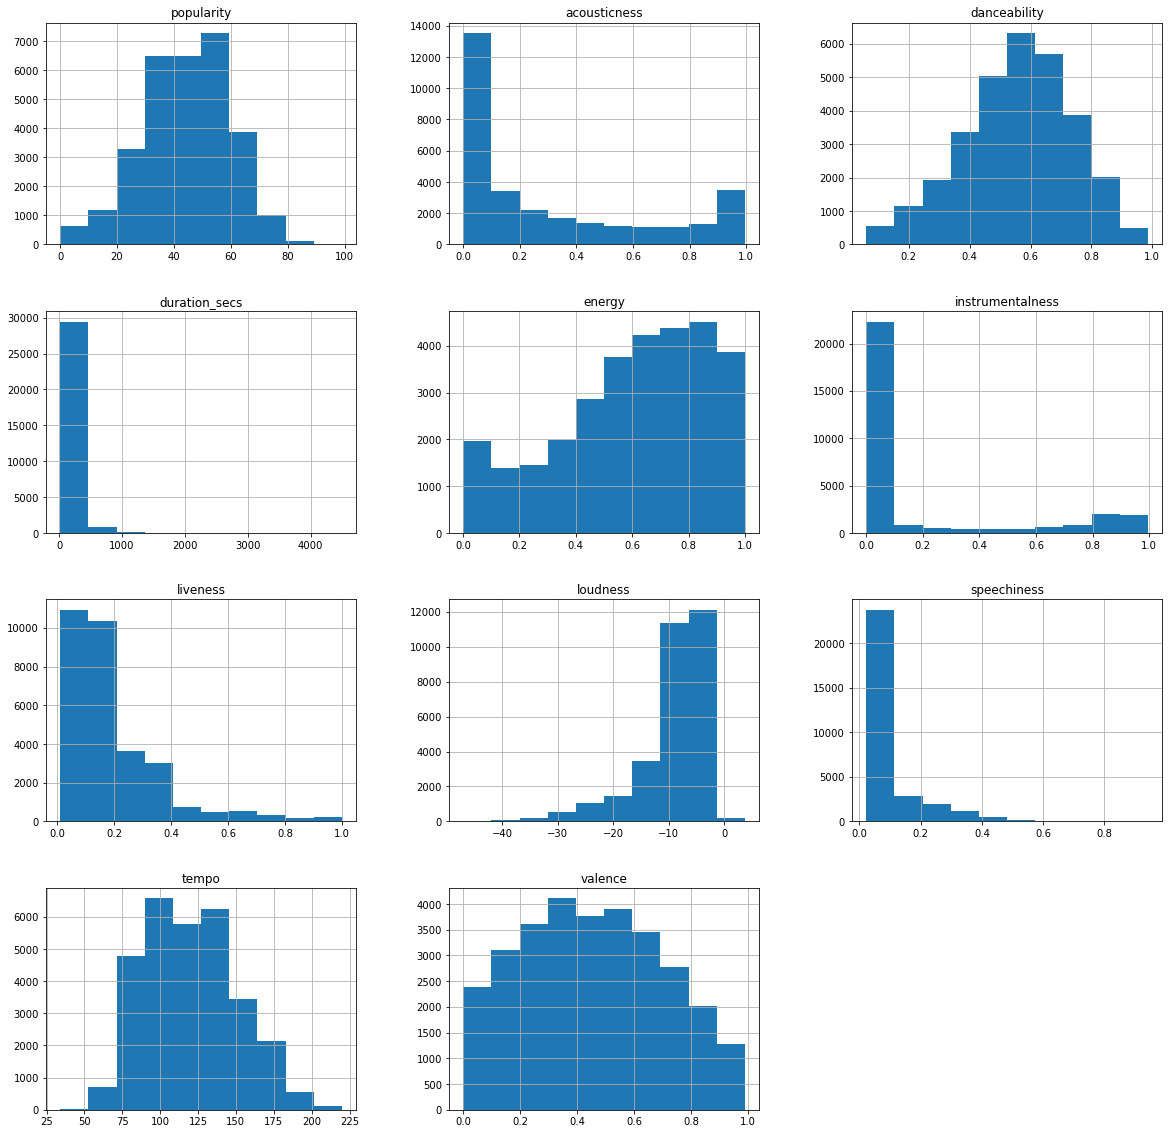

In [5]:
# histograms of training data
histograms = train_df.hist(figsize=(20, 20))

In [59]:
train_features = df.drop(['music_genre'], axis=1)
# Descriptive Statistics
print("*****************************************************************")
for col in train_features:
    print("{} mean = {}".format(col, np.mean(train_features[col])))
    print("{} median = {}".format(col, np.median(train_features[col])))
    print("{} standard deviation = {}".format(col, np.std(train_features[col])))
    print("*****************************************************************")

*****************************************************************
popularity mean = 44.27667652859961
popularity median = 45.0
popularity standard deviation = 15.545424893143942
*****************************************************************
acousticness mean = 0.3059741035929516
acousticness median = 0.144
acousticness standard deviation = 0.34110332264925447
*****************************************************************
danceability mean = 0.5584182766272172
danceability median = 0.569
danceability standard deviation = 0.1786497836060359
*****************************************************************
duration_secs mean = 245.4895286982257
duration_secs median = 227.533
duration_secs standard deviation = 110.12004811266449
*****************************************************************
energy mean = 0.6003298356755435
energy median = 0.644
energy standard deviation = 0.26449726088010944
*****************************************************************
instrumentalness mean = 

In [7]:
# KNN HERE

In [30]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [54]:
model = GaussianNB()
training_features = train_df.drop(['music_genre'], axis=1)
training_labels = train_df['music_genre']
model.fit(training_features, training_labels)
predicted = model.predict(training_features)

print('training set:')
print(metrics.classification_report(training_labels, predicted))
print(metrics.confusion_matrix(training_labels, predicted))

print('testing set:')
testing_features = test_df.drop(['music_genre'], axis=1)
testing_labels = test_df['music_genre']
predicted = model.predict(testing_features)
print(metrics.classification_report(testing_labels, predicted))
print(metrics.confusion_matrix(testing_labels, predicted))

training set:
              precision    recall  f1-score   support

 Alternative       0.38      0.15      0.22      3005
       Anime       0.66      0.38      0.48      3054
       Blues       0.46      0.21      0.29      3079
   Classical       0.66      0.86      0.75      2988
     Country       0.26      0.78      0.39      3079
  Electronic       0.52      0.41      0.46      3028
     Hip-Hop       0.42      0.35      0.38      3031
        Jazz       0.43      0.29      0.35      3056
         Rap       0.43      0.52      0.47      3044
        Rock       0.53      0.38      0.44      3056

    accuracy                           0.43     30420
   macro avg       0.47      0.43      0.42     30420
weighted avg       0.47      0.43      0.42     30420

[[ 461    9   47   28 1427  133  254  136  173  337]
 [  77 1168  159  549  847  174    3   63    3   11]
 [  92  234  644  109 1449  176   18  276    8   73]
 [  48   71   29 2572   81   74    0  109    0    4]
 [  43   28   9

In [9]:
# RANDOM FOREST HERE